## Proektarbeit
#### Tema: *Learning Model for Glioma Grading*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

### Daten Vorbereitung

In [2]:
df = pd.read_csv("Daten/TCGA_GBM_LGG_Mutations_all.csv", sep=",", index_col=2)
df.head(1)

,Grade,Project,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Case_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-DU-8164,LGG,TCGA-LGG,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, TCGA-DU-8164 to TCGA-06-2557
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Gender             862 non-null    object
 3   Age_at_diagnosis   862 non-null    object
 4   Primary_Diagnosis  862 non-null    object
 5   Race               862 non-null    object
 6   IDH1               862 non-null    object
 7   TP53               862 non-null    object
 8   ATRX               862 non-null    object
 9   PTEN               862 non-null    object
 10  EGFR               862 non-null    object
 11  CIC                862 non-null    object
 12  MUC16              862 non-null    object
 13  PIK3CA             862 non-null    object
 14  NF1                862 non-null    object
 15  PIK3R1             862 non-null    object
 16  FUBP1              862 non-nu

Alle Spalten haben Type **Object**

Keine **NaN** Werte

Überprüfen für **Null Synonyme**

In [4]:
df.Primary_Diagnosis.unique()

array(['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS',
       'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic', '--',
       'Glioblastoma'], dtype=object)

Das **"--"** gefunden
weiter suchen und löschen

In [5]:
df = df.loc[df.Primary_Diagnosis != '--', :]
df.Primary_Diagnosis.unique()

array(['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS',
       'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic',
       'Glioblastoma'], dtype=object)

In [6]:
df.Age_at_diagnosis.sort_values().unique()

array(['--', '14 years 154 days', '17 years 271 days', '19 years 55 days',
       '20 years 116 days', '20 years 276 days', '20 years 307 days',
       '20 years 359 days', '20 years 75 days', '20 years 84 days',
       '21 years 243 days', '21 years 266 days', '21 years 276 days',
       '21 years 288 days', '22 years 205 days', '22 years 236 days',
       '22 years 300 days', '22 years 305 days', '22 years 8 days',
       '23 years 108 days', '23 years 133 days', '23 years 171 days',
       '23 years 3 days', '23 years 310 days', '23 years 352 days',
       '24 years 146 days', '24 years 156 days', '24 years 181 days',
       '24 years 239 days', '24 years 278 days', '24 years 51 days',
       '24 years 54 days', '24 years 83 days', '25 years 191 days',
       '25 years 214 days', '25 years 232 days', '25 years 249 days',
       '25 years 282 days', '25 years 316 days', '25 years 41 days',
       '25 years 78 days', '25 years 82 days', '25 years 97 days',
       '26 years 118 days', 

In [7]:
df = df.loc[df.Age_at_diagnosis != '--', :]

In [8]:
df.Race.unique()

array(['white', 'asian', 'black or african american', 'not reported',
       'american indian or alaska native'], dtype=object)

Noch wurde **NaN Synonym** gefunden: 'not reported'

-zu remove

In [9]:
df.Race[df.Race == 'not reported'].count()

18

In [10]:
df = df[df.Race != 'not reported']
df.Race.unique()

array(['white', 'asian', 'black or african american',
       'american indian or alaska native'], dtype=object)

In [11]:
df.loc[df.duplicated(keep=False),:].shape[0]

0

Keine **Duplikate** gefunden

Weiter löschen die Spalten, die **Glioma Grade** direkt anzeigen und die **Case_ID

In [12]:
df1 = df.reset_index().drop(columns=["Project", "Primary_Diagnosis", "Case_ID"])
df1.head(1)

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,Male,51 years 108 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [13]:
def age_convert(age):
    splt = age.split(" ")
    years = int(splt[0])
    tags = int(splt[2]) if len(splt)>2 else 0
    return (years*365+tags)/365

Konvertieren der Alt in float Format, neue Spalte "age", die alte - zu löschen

In [14]:
df1["age"] = df1.Age_at_diagnosis.apply(age_convert)
df1.drop(columns="Age_at_diagnosis", inplace=True)
df1.head(1)

,Grade,Gender,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,age
0,LGG,Male,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,51.29589


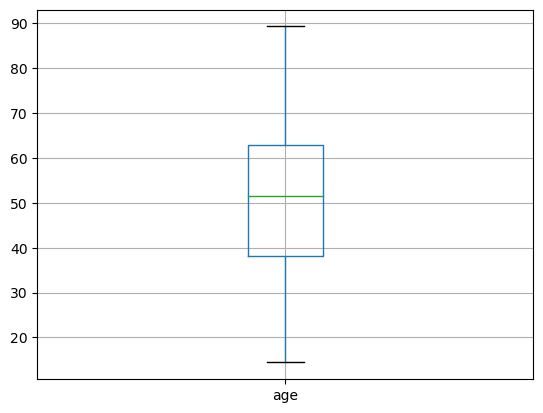

In [15]:
df1.boxplot('age')
plt.show()

die Spalte age weist eine **Normalverteilung** auf, **ohne Ausreißer**

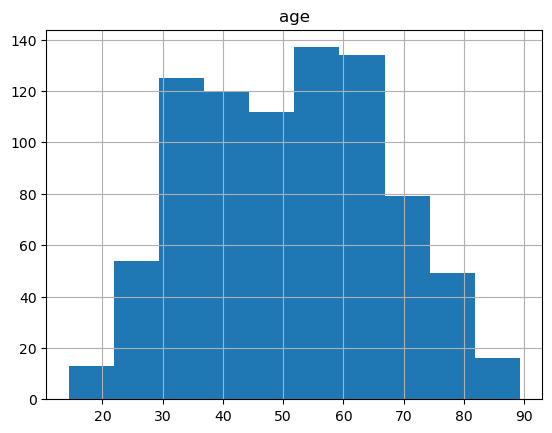

In [16]:
df1.hist('age')
plt.show()

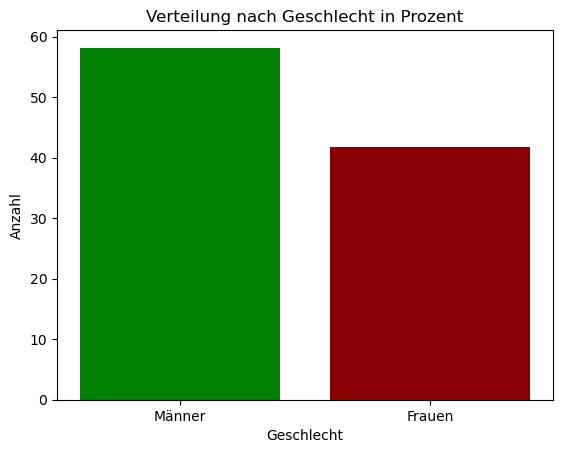

In [17]:
# Gesamtanzahl der Beobachtungen
gesamtanzahl = len(df)

# Anzahl der Männer (1) und Frauen (0) zählen
anzahl_maenner = (df1['Gender'] == 'Male').sum()/ gesamtanzahl * 100
anzahl_frauen = (df1['Gender'] == 'Female').sum()/ gesamtanzahl * 100

# Plotten
labels = ['Männer', 'Frauen']
values = [anzahl_maenner, anzahl_frauen]

plt.bar(labels, values, color=['green', 'darkred'])
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.title('Verteilung nach Geschlecht in Prozent')
plt.show()

Die **Geschlechterklassen** im Datensatz sind **gut gleichmäßig** vertreten

In [18]:
obj_cols = list(df1.select_dtypes("object").columns)
obj_cols

['Grade',
 'Gender',
 'Race',
 'IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

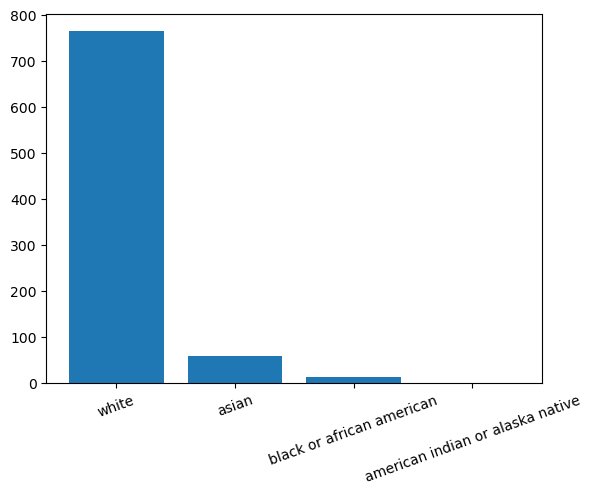

In [19]:
plt.bar(df1.Race.unique(), df1.Race.value_counts())
plt.xticks(rotation=20)
plt.show()

Die Klassen der Eigenschaft **"Race"** sind **unausgeglichen**, was das Training des Modells **erschweren kann**

die Klasse **'american indian or alaska native'** hat nur **einen Vertreter** - zu löschen

In [20]:
df1.Race.value_counts()

white                               765
black or african american            59
asian                                14
american indian or alaska native      1
Name: Race, dtype: int64

In [21]:
df1 = df1[df1.Race != 'american indian or alaska native']

In [22]:
df1.Race.value_counts()

white                        765
black or african american     59
asian                         14
Name: Race, dtype: int64

### Daten trennen und kodieren

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Diese unten folgende Funktionen kodieren die Daten

**encoding_GA_main** -  ganzen Datensatz in 0-1 und "Race" mit LabelEncoder

**encoding_GA_Label** - gespalten Datensatz in 0-1 und "Race" mit LabelEncoder

**encoding_GA** -       gespalten Datensatz in 0-1 und "Race" mit OneHotEncoder

In [24]:
# LabelEncoder für ganzen Datafame

def encoding_GA_main(df_ = None):
    if df_ is None:
        return
    encoding_map = {
                    'MUTATED': 1,
                    'NOT_MUTATED': 0
                   }
    df_[obj_cols[3:]] = df_[obj_cols[3:]].apply(lambda x: x.map(encoding_map))
    encoding_map = {
                    'Male': 1,
                    'Female': 0
                    }
    df_['Gender'] = df_['Gender'].map(encoding_map)
    df_.rename(columns={'Gender':'is_male'}, inplace=True)
    encoding_map = {
                    'GBM': 1,
                    'LGG': 0
                    }
    df_['Grade'] = df_['Grade'].map(encoding_map)
    encoder = LabelEncoder()
    df_['Race'] = encoder.fit_transform(df_['Race'])
    return df_

In [25]:
# LabelEncoder für gespalten Datensatz
def encoding_GA_Label(*args):
    res=[]
    for df in args:
        if type(df) == pd.core.series.Series:
            encoding_map = {
                                'GBM': 1,
                                'LGG': 0
                            }
            res.append(df.map(encoding_map))
            
        else:
            encoding_map = {
                                'MUTATED': 1,
                                'NOT_MUTATED': 0
                            }
            
            df[obj_cols[3:]] = df[obj_cols[3:]].apply(lambda x: x.map(encoding_map))
            encoding_map = {
                                'Male': 1,
                                'Female': 0
                            }
            df['Gender'] = df['Gender'].map(encoding_map)
            df.rename(columns={'Gender':'is_male'}, inplace=True)
            df_index = df.index
            df.reset_index(drop=True, inplace=True)
            encoder = LabelEncoder()
            df['Race'] = encoder.fit_transform(df['Race'])
            res.append(df)
    
    return res

In [26]:
# OneHotEncoder für gespalten Datensatz
def encoding_GA(*args):
    res=[]
    for df in args:
        if type(df) == pd.core.series.Series:
            encoding_map = {
                                'GBM': 1,
                                'LGG': 0
                            }
            res.append(df.map(encoding_map))
            
        else:
            encoding_map = {
                                'MUTATED': 1,
                                'NOT_MUTATED': 0
                            }
            
            df[obj_cols[3:]] = df[obj_cols[3:]].apply(lambda x: x.map(encoding_map))
            encoding_map = {
                                'Male': 1,
                                'Female': 0
                            }
            df['Gender'] = df['Gender'].map(encoding_map)
            df.rename(columns={'Gender':'is_male'}, inplace=True)
            df_index = df.index                     # OneHotEncoder transformiert die daten ohne index
            df.reset_index(drop=True, inplace=True) # deswegen wird index gespeichert und gelöscht
            encoder = OneHotEncoder(sparse_output=False)
            encoded_data = encoder.fit_transform(df[['Race']])
            encoded_cols = encoder.get_feature_names_out()
            encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)
            encoded_df = encoded_df.rename(columns=dict(zip(encoded_cols,['is_asian', 'is_black', 'is_white'])))
            df = df.join(encoded_df)
            df.set_index(df_index, inplace=True) # setzen index zurück
            df.drop(columns='Race', inplace=True) 
            res.append(df)
    
    return res

In [27]:
from sklearn.model_selection import train_test_split
r_state = 42

Splitten ohne **stratify**

kodieren **gespaltete Daten** mit **OneHotEncoder**

In [28]:
X_train, X_test, y_train, y_test =  train_test_split(df1.iloc[:,1:], df1.iloc[:,0],
                                                     test_size=0.2, random_state = r_state)

X_train, X_test, y_train, y_test = encoding_GA(X_train, X_test, y_train, y_test)
X_train.head(3)

,is_male,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,age,is_asian,is_black,is_white
771,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,64.136986,0.0,0.0,1.0
749,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,60.673973,0.0,0.0,1.0
829,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,58.054795,0.0,0.0,1.0


Splitten mit **stratify = df1.Grade** (Zielspalte)

kodieren **gespaltete Daten** mit **LabelEncoder**

bei dieser Methode bekommen wir die Beste Ergebnisse

In [29]:
X_train_lab, X_test_lab, y_train_lab, y_test_lab =  train_test_split(df1.iloc[:,1:], df1.iloc[:,0],
                                                     test_size=0.2, random_state = r_state, stratify=df1.Grade)

X_train_lab, X_test_lab, y_train_lab, y_test_lab = encoding_GA_Label(X_train_lab, X_test_lab, y_train_lab, y_test_lab)

In [30]:
stratify_var = df1.Grade.astype(str) + '_' + df1.Race.astype(str)

X_train_strf, X_test_strf, y_train_strf, y_test_strf =  train_test_split(df1.iloc[:,1:], df1.iloc[:,0],
                                                     test_size=0.2, random_state = r_state, stratify=stratify_var)

X_train_strf, X_test_strf, y_train_strf, y_test_strf = encoding_GA_Label(X_train_strf, X_test_strf, y_train_strf, y_test_strf)
X_train_strf.head(3)

,is_male,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,age
0,1,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,64.136986
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37.454795
2,1,2,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,63.857534


In [131]:
# Teilen Dataset mit Ausgleichen von Klassen Gender + Race, LabelEncoder

stratify_var = df1.Gender.astype(str) + '_' + df1.Race.astype(str)

X_train_rg, X_test_rg, y_train_rg, y_test_rg =  train_test_split(df1.iloc[:,1:], df1.iloc[:,0],
                                                     test_size=0.2, random_state = r_state, stratify=stratify_var)

X_train_rg, X_test_rg, y_train_rg, y_test_rg = encoding_GA_Label(X_train_rg, X_test_rg, y_train_rg, y_test_rg)
X_train_rg.head(3)

,is_male,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,age
0,0,2,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,55.126027
1,1,2,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,60.706849
2,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,36.827397


In [31]:
# gespalter Datensatz, kodiert mit LabelEncoder
# um auf denselben Datenset unsere Modelle trainieren und vergleichen

X_train_csv = pd.read_csv("Train-Test-Daten/X_train.csv", sep=",")
X_test_csv = pd.read_csv("Train-Test-Daten/X_test.csv", sep=",")
y_train_csv = pd.read_csv("Train-Test-Daten/y_train.csv")
y_test_csv = pd.read_csv("Train-Test-Daten/y_test.csv")


Splitten mit **stratify = df1.Grade** (Zielspalte)

kodieren **gespaltete Daten** mit **LabelEncoder**

wir probieren es, den Datensatz mit stratify=df1.Race zu teilen, damit Race-Klassen zu ausgeglichen versuchen

In [32]:
xtrain, xtest, ytrain, ytest =  train_test_split(df1.iloc[:,1:], df1.iloc[:,0], test_size=0.2,
                                                     random_state=r_state, stratify=df1.Race)

xtrain, xtest, ytrain, ytest = encoding_GA(xtrain, xtest, ytrain, ytest)
xtrain.head(3)

,is_male,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,age,is_asian,is_black,is_white
272,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,26.323288,0.0,0.0,1.0
143,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,42.386301,0.0,0.0,1.0
431,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52.427397,0.0,0.0,1.0


In [33]:
df_encoded = encoding_GA_main(df1.copy())
df_encoded.head(3)

,Grade,is_male,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,age
0,0,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51.295890
1,0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,38.715068
2,0,1,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.169863


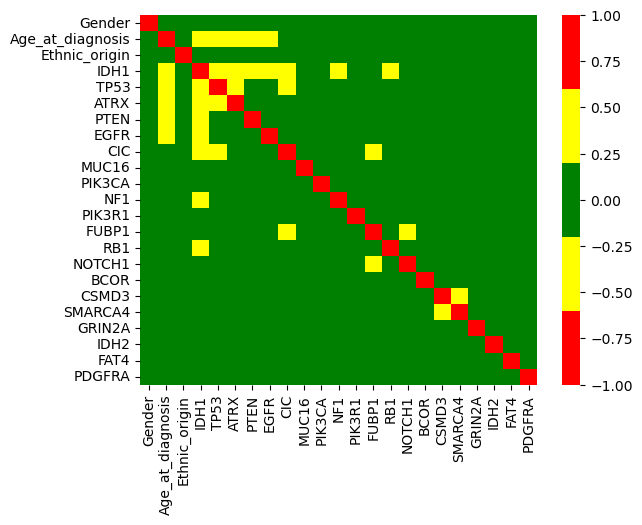

In [124]:
# Kodiert mit LabelEncoder
sns.heatmap(X_train_csv.corr(), cmap=['red','yellow','green','yellow','red'], vmax=1, vmin=-1)
plt.show()

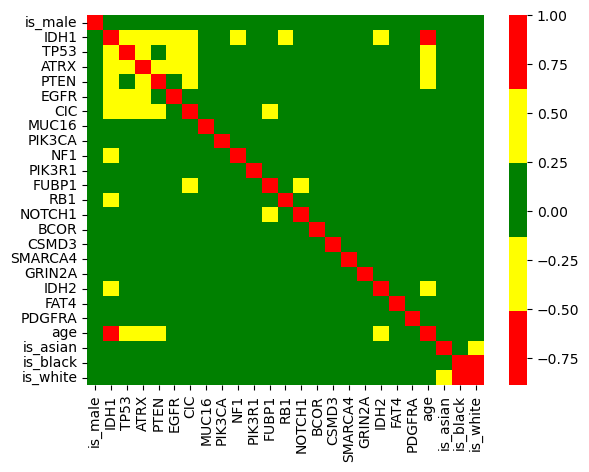

In [34]:
# Kodiert mit OneHotEncoder
sns.heatmap(X_train.corr(), cmap=['red','yellow','green','yellow','red'])
plt.show()

die **Heatmap** zeigt, dass es einen Sinn macht, **PCA** zu benutzen

wir speichern weiter unsere "klean" Data

In [35]:
df1.to_pickle('Daten/TCGA_GBM_LGG_Mutations_clean.pkl')

#### Daten Skalieren

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [135]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
X_train_lab_scaled = scaler.fit_transform(X_train_lab)
X_test_lab_scaled = scaler.transform(X_test_lab)
X_train_csv_scaled = scaler.fit_transform(X_train_csv)
X_test_csv_scaled = scaler.transform(X_test_csv)
X_train_rg_scaled = scaler.fit_transform(X_train_rg)
X_test_rg_scaled = scaler.transform(X_test_rg)


wir haben testiert 

In [38]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca.components_.shape

(21, 25)

In [39]:
pca_lab = PCA(n_components=0.95)
X_train_lab_pca = pca.fit_transform(X_train_lab_scaled)
X_test_lab_pca = pca.transform(X_test_lab_scaled)
pca.components_.shape

(20, 23)

In [40]:
pca = PCA(n_components=0.95)
X_train_csv_pca = pca.fit_transform(X_train_csv_scaled)
X_test_csv_pca = pca.transform(X_test_csv_scaled)
pca.components_.shape

(20, 23)

In [137]:
pca = PCA(n_components=0.95)
X_train_rg_pca = pca.fit_transform(X_train_rg_scaled)
X_test_rg_pca = pca.transform(X_test_rg_scaled)
pca.components_.shape

(20, 23)

In [41]:
from imblearn.over_sampling import SMOTE 

**SMOTE** erhöht die Anzahl der schlecht vertretenen Klassen mit dem K-Neighbor-Algorithmus

Bei der Verwendung von SMOTE zeigte es nicht ausstehende Ergebnisse nur für Trainingsdaten.

Möglicherweise wird ein gutes Ergebnis angezeigt, wenn es sich um den gesamten Datensatz bewerbt, aber dann wird die Frage des Datenlecks auftreten. Im Internet unterscheiden sich die Meinungen über den Einfluss auf das Overfitting des Modells

In [42]:
sm = SMOTE(random_state = r_state, k_neighbors = 5)
X_train_sm, y_train_sm = sm.fit_resample(X_train_pca, y_train)

In [43]:
X_train_lab_sm, y_train_lab_sm = sm.fit_resample(X_train_lab_scaled, y_train_lab)

In [44]:
X_train_csv_sm, y_train_csv_sm = sm.fit_resample(X_train_csv_pca, y_train)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [77]:
# DecisionTreeClassifier
criterion = ["gini", "entropy"]
max_depth = [3,5,10,15,None]

parameters = []

for c in criterion:
    for depth in max_depth:
        parameters.append({"criterion": c, "max_depth": depth})

results_dt={
    'train_accuracy':[],
    'test_accuracy':[],
    'test_f1':[],
    'parameters':[]
}

for params in parameters:
    dt = DecisionTreeClassifier(**params, random_state=r_state)
    dt.fit(X_train_lab_scaled, y_train_lab)
    y_train_pred = dt.predict(X_train_lab_scaled)
    y_test_pred = dt.predict(X_test_lab_scaled)
    results_dt['train_accuracy'].append(accuracy_score(y_train_lab, y_train_pred))
    results_dt['test_accuracy'].append(accuracy_score(y_test_lab, y_test_pred))
    results_dt['test_f1'].append(f1_score(y_test_lab, y_test_pred))
    results_dt['parameters'].append(params)
    
df_res_dt = pd.DataFrame(results_dt)  
df_res_dt = df_res_dt.sort_values('test_accuracy', ascending=False)
df_res_dt.reset_index(drop=True, inplace=True)
df_res_dt

,train_accuracy,test_accuracy,test_f1,parameters
0,0.894030,0.875000,0.862745,"{'criterion': 'gini', 'max_depth': 5}"
1,0.876119,0.869048,0.857143,"{'criterion': 'gini', 'max_depth': 3}"
2,0.876119,0.869048,0.857143,"{'criterion': 'entropy', 'max_depth': 3}"
3,0.894030,0.869048,0.855263,"{'criterion': 'entropy', 'max_depth': 5}"
4,0.938806,0.815476,0.776978,"{'criterion': 'gini', 'max_depth': 10}"
5,0.928358,0.815476,0.786207,"{'criterion': 'entropy', 'max_depth': 10}"
6,0.989552,0.809524,0.777778,"{'criterion': 'gini', 'max_depth': 15}"
7,1.000000,0.791667,0.744526,"{'criterion': 'entropy', 'max_depth': None}"
8,1.000000,0.785714,0.742857,"{'criterion': 'gini', 'max_depth': None}"
9,0.979104,0.785714,0.731343,"{'criterion': 'entropy', 'max_depth': 15}"


In [78]:
# RandomForestClassifier skaliert
criterion = ["gini", "entropy"]
max_depth = [3,5,10,15,None]
n_estimators = [10, 100, 500]

parameters = []
for c in criterion:
    for depth in max_depth:
        for n in n_estimators:
            parameters.append({"criterion": c, "max_depth": depth, 'n_estimators': n})

results_dt={
    'train_accuracy':[],
    'test_accuracy':[],
    'test_f1':[],
    'parameters':[]
}

for params in parameters:
    dt = RandomForestClassifier(**params, random_state=r_state)
    dt.fit(X_train_lab_scaled, y_train_lab)
    y_train_pred = dt.predict(X_train_lab_scaled)
    y_test_pred = dt.predict(X_test_lab_scaled)
    results_dt['train_accuracy'].append(accuracy_score(y_train_lab, y_train_pred))
    results_dt['test_accuracy'].append(accuracy_score(y_test_lab, y_test_pred))
    results_dt['test_f1'].append(f1_score(y_test_lab, y_test_pred))
    results_dt['parameters'].append(params)
    
df_res=pd.DataFrame(results_dt) 
df_res = df_res.sort_values('test_accuracy', ascending=False)
df_res.reset_index(drop=True, inplace=True)
df_res

,train_accuracy,test_accuracy,test_f1,parameters
0,0.911940,0.875000,0.859060,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
1,0.877612,0.875000,0.862745,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.861194,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
3,0.871642,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
4,0.904478,0.869048,0.855263,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.882090,0.869048,0.855263,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
6,0.868657,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."
7,0.868657,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."
8,0.862687,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."
9,0.879104,0.869048,0.857143,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."


In [80]:
# CSV Dataset RandomForestClassifier PCA
criterion = ["gini", "entropy"]
max_depth = [3,5,10,15,None]
n_estimators = [10, 100, 500]

parameters = []
for c in criterion:
    for depth in max_depth:
        for n in n_estimators:
            parameters.append({"criterion": c, "max_depth": depth, 'n_estimators': n})

results_dt={
    'train_accuracy':[],
    'test_accuracy':[],
    'test_f1':[],
    'parameters':[]
}

for params in parameters:
    dt = RandomForestClassifier(**params, random_state=r_state)
    dt.fit(X_train_csv_pca, y_train_csv.values.ravel())
    y_train_pred = dt.predict(X_train_csv_pca)
    y_test_pred = dt.predict(X_test_csv_pca)
    results_dt['train_accuracy'].append(accuracy_score(y_train_csv.values.ravel(), y_train_pred))
    results_dt['test_accuracy'].append(accuracy_score(y_test_csv.values.ravel(), y_test_pred))
    results_dt['test_f1'].append(f1_score(y_test_csv.values.ravel(), y_test_pred))
    results_dt['parameters'].append(params)
    
df_res=pd.DataFrame(results_dt) 
df_res = df_res.sort_values('test_accuracy', ascending=False)
df_res.reset_index(drop=True, inplace=True)
df_res

,train_accuracy,test_accuracy,test_f1,parameters
0,0.897015,0.892857,0.898876,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
1,0.898507,0.886905,0.893855,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
2,0.889552,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.891045,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.865672,0.875000,0.885246,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."
5,0.889552,0.875000,0.880000,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
6,0.861194,0.869048,0.879121,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
7,0.865672,0.869048,0.879121,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
8,0.862687,0.869048,0.879121,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."
9,0.861194,0.863095,0.874317,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."


In [129]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=0.95)), 
    ('classifier', DecisionTreeClassifier(**df_res_dt.parameters[0]))
])

results = cross_validate(pipeline, df_encoded.iloc[:,1:], df_encoded.iloc[:,0], cv=5,
                         scoring=['accuracy', 'f1_weighted'],
                         return_train_score=True)

res_dt = pd.DataFrame(results)
res_dt

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_weighted,train_f1_weighted
0,0.013020,0.003001,0.839286,0.907463,0.840405,0.907898
1,0.006868,0.003000,0.857143,0.907463,0.857759,0.907156
2,0.007504,0.003037,0.821429,0.900000,0.821739,0.900592
3,0.009509,0.003000,0.838323,0.901639,0.839274,0.902188
4,0.009504,0.002002,0.874251,0.910581,0.874122,0.911064


In [103]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(**df_res.parameters[0]))
])

results = cross_validate(pipeline, df_encoded.iloc[:,1:], df_encoded.iloc[:,0], cv=10,
                         scoring=['accuracy', 'f1_weighted'],
                         return_train_score=True)

res_df = pd.DataFrame(results)
res_df

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_weighted,train_f1_weighted
0,0.177141,0.010214,0.857143,0.901857,0.857955,0.902415
1,0.184336,0.009505,0.857143,0.895225,0.858124,0.895741
2,0.171618,0.008013,0.880952,0.909814,0.880952,0.910284
3,0.160261,0.007506,0.821429,0.893899,0.822265,0.894410
4,0.159594,0.008512,0.869048,0.893899,0.869671,0.894488
5,0.160612,0.008713,0.833333,0.903183,0.834292,0.903696
6,0.171185,0.008512,0.845238,0.897878,0.845837,0.898370
7,0.174843,0.008023,0.833333,0.892573,0.834096,0.893192
8,0.176759,0.008504,0.843373,0.898013,0.842240,0.898520
9,0.196314,0.008619,0.903614,0.896689,0.903928,0.897168


In [94]:
def test_gridsearch(X_train, X_test, y_train, y_test):
    models_params = {
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ['entropy', 'gini'],
                'n_estimators': [10, 50, 100],
                'max_depth': [5, 7, 10]
            }
        },
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['entropy', 'gini'],
                'max_depth': [5, 7, 10]
            }
        },

    }
    results = []
    for model_name, mp in models_params.items():
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X_train, y_train)

        best_model = clf.best_estimator_    
        predictions = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        
        for mean_score, mean_time, params in zip(clf.cv_results_['mean_test_score'], 
                                                 clf.cv_results_['mean_fit_time'],
                                                 clf.cv_results_['params']):
            results.append({
                'Model': model_name,
                'TrainScore': mean_score,
                'FitTime': mean_time,
                'BestTestScore': accuracy,
                'BestF1TestScore': f1,
                'Parameters': params
            })

    results_df = pd.DataFrame(results)
    results_df.sort_values(by='TrainScore', ascending=False, inplace=True)
    results_df.reset_index(drop=True, inplace=True)
    return results_df


In [91]:
# Dataset LabelEncoder
test_grid_01 = test_gridsearch(X_train_lab_scaled, X_test_lab_scaled, y_train_lab, y_test_lab)
test_grid_01

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.876119,0.083411,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
1,RandomForestClassifier,0.876119,0.088504,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
2,RandomForestClassifier,0.873134,0.042626,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,RandomForestClassifier,0.871642,0.044992,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
4,RandomForestClassifier,0.871642,0.092419,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,RandomForestClassifier,0.871642,0.043235,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
6,RandomForestClassifier,0.868657,0.086314,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
7,RandomForestClassifier,0.867164,0.085082,0.869048,0.853333,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
8,RandomForestClassifier,0.867164,0.089651,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
9,RandomForestClassifier,0.867164,0.041982,0.869048,0.853333,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."


In [92]:
# Dataset LabelEncoder + PCA
test_grid_02 = test_gridsearch(X_train_lab_pca, X_test_lab_pca, y_train_lab, y_test_lab)
test_grid_02

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.853731,0.155181,0.87500,0.860927,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,RandomForestClassifier,0.852239,0.144804,0.87500,0.860927,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
2,RandomForestClassifier,0.850746,0.172440,0.87500,0.860927,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
3,RandomForestClassifier,0.847761,0.130906,0.87500,0.860927,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
4,RandomForestClassifier,0.847761,0.086736,0.87500,0.860927,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
5,RandomForestClassifier,0.847761,0.077808,0.87500,0.860927,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
6,RandomForestClassifier,0.846269,0.013621,0.87500,0.860927,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
7,RandomForestClassifier,0.844776,0.073271,0.87500,0.860927,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
8,RandomForestClassifier,0.843284,0.015141,0.87500,0.860927,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
9,RandomForestClassifier,0.841791,0.065562,0.87500,0.860927,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."


{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}

In [125]:
# CSV Dataset unskaliert
test_grid_03 = test_gridsearch(X_train_csv, X_test_csv, y_train_csv.values.ravel(), y_test_csv.values.ravel())
test_grid_03


,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.876119,0.088290,0.880952,0.886364,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
1,RandomForestClassifier,0.874627,0.047891,0.880952,0.886364,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
2,RandomForestClassifier,0.873134,0.044093,0.880952,0.886364,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
3,RandomForestClassifier,0.873134,0.045382,0.880952,0.886364,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
4,RandomForestClassifier,0.871642,0.083916,0.880952,0.886364,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
5,RandomForestClassifier,0.870149,0.012953,0.880952,0.886364,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
6,RandomForestClassifier,0.870149,0.090407,0.880952,0.886364,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
7,RandomForestClassifier,0.868657,0.092718,0.880952,0.886364,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,RandomForestClassifier,0.868657,0.085539,0.880952,0.886364,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
9,RandomForestClassifier,0.868657,0.086545,0.880952,0.886364,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."


In [127]:
# CSV Dataset, skaliert
test_grid_04 = test_gridsearch(X_train_csv_scaled, X_test_csv_scaled, y_train_csv.values.ravel(), y_test_csv.values.ravel())
test_grid_04

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.874627,0.046063,0.880952,0.888889,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
1,RandomForestClassifier,0.873134,0.087450,0.880952,0.888889,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
2,RandomForestClassifier,0.873134,0.091596,0.880952,0.888889,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
3,RandomForestClassifier,0.873134,0.043153,0.880952,0.888889,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
4,RandomForestClassifier,0.870149,0.044053,0.880952,0.888889,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
5,RandomForestClassifier,0.870149,0.008710,0.880952,0.888889,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
6,RandomForestClassifier,0.870149,0.041727,0.880952,0.888889,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
7,RandomForestClassifier,0.870149,0.042661,0.880952,0.888889,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
8,RandomForestClassifier,0.867164,0.084991,0.880952,0.888889,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
9,RandomForestClassifier,0.867164,0.089322,0.880952,0.888889,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."


In [97]:
# CSV Dataset + PCA
test_grid_05 = test_gridsearch(X_train_csv_pca, X_test_csv_pca, y_train_csv.values.ravel(), y_test_csv.values.ravel())
test_grid_05

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.856716,0.154917,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,RandomForestClassifier,0.856716,0.066476,0.880952,0.887640,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
2,RandomForestClassifier,0.856716,0.076947,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,RandomForestClassifier,0.850746,0.131020,0.880952,0.887640,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
4,RandomForestClassifier,0.850746,0.073062,0.880952,0.887640,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
5,RandomForestClassifier,0.850746,0.146225,0.880952,0.887640,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
6,RandomForestClassifier,0.847761,0.170777,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
7,RandomForestClassifier,0.843284,0.086435,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
8,RandomForestClassifier,0.840299,0.015711,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
9,RandomForestClassifier,0.837313,0.017553,0.880952,0.887640,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."


In [98]:
# Stratifizierter mit Grade + Race Dataset OneHotEncoder unskaliert
test_grid_06 = test_gridsearch(X_train_strf, X_test_strf, y_train_strf, y_test_strf)
test_grid_06

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.877612,0.086207,0.833333,0.810811,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,RandomForestClassifier,0.877612,0.084637,0.833333,0.810811,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
2,RandomForestClassifier,0.876119,0.045120,0.833333,0.810811,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
3,RandomForestClassifier,0.876119,0.089493,0.833333,0.810811,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
4,RandomForestClassifier,0.876119,0.010406,0.833333,0.810811,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
5,RandomForestClassifier,0.876119,0.009708,0.833333,0.810811,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
6,RandomForestClassifier,0.876119,0.092952,0.833333,0.810811,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,RandomForestClassifier,0.876119,0.043696,0.833333,0.810811,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
8,RandomForestClassifier,0.876119,0.044134,0.833333,0.810811,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
9,RandomForestClassifier,0.874627,0.088325,0.833333,0.810811,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."


In [99]:
# Dataset OneHotEncoder skaliert
test_grid_07 = test_gridsearch(X_train_scaled, X_test_scaled, y_train, y_test)
test_grid_07

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.885075,0.087119,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,RandomForestClassifier,0.882090,0.091011,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
2,RandomForestClassifier,0.880597,0.009640,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,RandomForestClassifier,0.880597,0.043073,0.839286,0.825806,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
4,RandomForestClassifier,0.880597,0.046295,0.839286,0.825806,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
5,RandomForestClassifier,0.880597,0.046067,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
6,RandomForestClassifier,0.879104,0.009511,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
7,RandomForestClassifier,0.879104,0.094728,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,RandomForestClassifier,0.879104,0.044731,0.839286,0.825806,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
9,RandomForestClassifier,0.877612,0.047569,0.839286,0.825806,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."


In [100]:
# Dataset, stratifizierter mit Race OneHotEncoder skaliert
test_grid_08 = test_gridsearch(xtrain_scaled, xtest_scaled, ytrain, ytest)
test_grid_08

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.876119,0.045310,0.875000,0.871166,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
1,RandomForestClassifier,0.876119,0.093762,0.875000,0.871166,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
2,RandomForestClassifier,0.876119,0.089890,0.875000,0.871166,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
3,RandomForestClassifier,0.874627,0.092050,0.875000,0.871166,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
4,RandomForestClassifier,0.871642,0.086667,0.875000,0.871166,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
5,RandomForestClassifier,0.870149,0.085313,0.875000,0.871166,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
6,RandomForestClassifier,0.870149,0.044912,0.875000,0.871166,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
7,RandomForestClassifier,0.868657,0.046132,0.875000,0.871166,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
8,RandomForestClassifier,0.868657,0.009720,0.875000,0.871166,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
9,RandomForestClassifier,0.868657,0.043397,0.875000,0.871166,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."


In [101]:
# Dataset OneHotEncoder + PCA
test_grid_09 = test_gridsearch(X_train_pca, X_test_pca, y_train, y_test)
test_grid_09 

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.865672,0.154863,0.827381,0.815287,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,RandomForestClassifier,0.864179,0.066097,0.827381,0.815287,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
2,RandomForestClassifier,0.861194,0.131429,0.827381,0.815287,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
3,RandomForestClassifier,0.856716,0.172807,0.827381,0.815287,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
4,RandomForestClassifier,0.856716,0.077694,0.827381,0.815287,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
5,RandomForestClassifier,0.856716,0.086148,0.827381,0.815287,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
6,RandomForestClassifier,0.852239,0.154600,0.827381,0.815287,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
7,RandomForestClassifier,0.852239,0.145689,0.827381,0.815287,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
8,RandomForestClassifier,0.850746,0.073490,0.827381,0.815287,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
9,RandomForestClassifier,0.850746,0.017654,0.827381,0.815287,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."


In [102]:
# Dataset OneHotEncoder + PCA + SMOTE
test_grid_10 = test_gridsearch(X_train_sm, X_test_pca, y_train_sm, y_test)
test_grid_10

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.884351,0.141456,0.833333,0.822785,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
1,RandomForestClassifier,0.881754,0.079378,0.833333,0.822785,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
2,RandomForestClassifier,0.880471,0.190668,0.833333,0.822785,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
3,RandomForestClassifier,0.879222,0.019821,0.833333,0.822785,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
4,RandomForestClassifier,0.879214,0.084334,0.833333,0.822785,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
5,RandomForestClassifier,0.879198,0.158651,0.833333,0.822785,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
6,RandomForestClassifier,0.877924,0.096105,0.833333,0.822785,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
7,RandomForestClassifier,0.877916,0.168660,0.833333,0.822785,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
8,RandomForestClassifier,0.876625,0.071057,0.833333,0.822785,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
9,RandomForestClassifier,0.875327,0.014376,0.833333,0.822785,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."


In [133]:
# Dataset, stratifizierter mit Gender + Race LabelEncoder unskaliert
test_grid_11 = test_gridsearch(X_train_rg, X_test_rg, y_train_rg, y_test_rg)
test_grid_11

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.868657,0.045175,0.904762,0.901235,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
1,RandomForestClassifier,0.867164,0.088030,0.904762,0.901235,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
2,RandomForestClassifier,0.867164,0.093938,0.904762,0.901235,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
3,RandomForestClassifier,0.865672,0.010305,0.904762,0.901235,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
4,RandomForestClassifier,0.865672,0.089156,0.904762,0.901235,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
5,RandomForestClassifier,0.864179,0.043092,0.904762,0.901235,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
6,RandomForestClassifier,0.864179,0.045105,0.904762,0.901235,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
7,RandomForestClassifier,0.862687,0.010214,0.904762,0.901235,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
8,RandomForestClassifier,0.862687,0.085940,0.904762,0.901235,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
9,RandomForestClassifier,0.862687,0.092155,0.904762,0.901235,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."


In [136]:
# Dataset, stratifizierter mit Gender + Race LabelEncoder skaliert
test_grid_12 = test_gridsearch(X_train_rg_scaled, X_test_rg_scaled, y_train_rg, y_test_rg)
test_grid_12

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.870149,0.044777,0.89881,0.895706,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
1,RandomForestClassifier,0.868657,0.085288,0.89881,0.895706,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
2,RandomForestClassifier,0.867164,0.042519,0.89881,0.895706,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
3,RandomForestClassifier,0.865672,0.009316,0.89881,0.895706,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
4,RandomForestClassifier,0.865672,0.043082,0.89881,0.895706,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
5,RandomForestClassifier,0.865672,0.089433,0.89881,0.895706,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
6,RandomForestClassifier,0.865672,0.044378,0.89881,0.895706,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
7,RandomForestClassifier,0.864179,0.046083,0.89881,0.895706,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
8,RandomForestClassifier,0.862687,0.087508,0.89881,0.895706,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
9,DecisionTreeClassifier,0.862687,0.000800,0.85119,0.846626,"{'criterion': 'entropy', 'max_depth': 5}"


In [138]:
# Dataset, stratifizierter mit Gender + Race LabelEncoder PCA
test_grid_13 = test_gridsearch(X_train_rg_pca, X_test_rg_pca, y_train_rg, y_test_rg)
test_grid_13

,Model,TrainScore,FitTime,BestTestScore,BestF1TestScore,Parameters
0,RandomForestClassifier,0.850746,0.078914,0.869048,0.858974,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,RandomForestClassifier,0.850746,0.013603,0.869048,0.858974,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
2,RandomForestClassifier,0.847761,0.016491,0.869048,0.858974,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,RandomForestClassifier,0.847761,0.156962,0.869048,0.858974,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,RandomForestClassifier,0.843284,0.066296,0.869048,0.858974,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
5,RandomForestClassifier,0.840299,0.132201,0.869048,0.858974,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
6,RandomForestClassifier,0.837313,0.146792,0.869048,0.858974,"{'criterion': 'gini', 'max_depth': 7, 'n_estim..."
7,RandomForestClassifier,0.831343,0.174765,0.869048,0.858974,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."
8,DecisionTreeClassifier,0.828358,0.005224,0.869048,0.864198,"{'criterion': 'entropy', 'max_depth': 5}"
9,RandomForestClassifier,0.828358,0.088635,0.869048,0.858974,"{'criterion': 'entropy', 'max_depth': 7, 'n_es..."


In [121]:
lr = LogisticRegression(C=0.8, solver="liblinear", max_iter=10000) # Beste parameters
svc = SVC(kernel="rbf", C=100, gamma="scale", probability=True) # für soft Voting muss SVC-probability True sein
dt = DecisionTreeClassifier(criterion='gini', max_depth=5) # Beste parameters

voting_clf = VotingClassifier(estimators=[
    ('lr', lr), ('svc', svc), ('dt', dt)], voting='hard')

voting_clf.fit(X_train_csv_pca, y_train_csv.values.ravel())

y_pred = voting_clf.predict(X_test_csv_pca)
VotingTestScore = accuracy_score(y_test_csv.values.ravel(), y_pred)
VotingF1Score = f1_score(y_test_csv.values.ravel(), y_pred)
print(f"Ensemble VotingClassifier TestScore: {VotingTestScore}\n" 
      f"Ensemble VotingClassifier F1Score: {VotingF1Score}")


Ensemble VotingClassifier TestScore: 0.8690476190476191
Ensemble VotingClassifier F1Score: 0.8777777777777779


In [117]:
# Probieren StackingClassifier

base_learners = [
    ('lr', LogisticRegression(C=0.8, solver="liblinear", max_iter=10000)), # Beste parameters
    ('svc', SVC(probability=True)), # SVC-probability muss True sein
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=5))  # Beste parameters
]

meta_learner = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100)

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacked_model.fit(X_train_csv_pca, y_train_csv.values.ravel())

y_pred = stacked_model.predict(X_test_csv_pca)
VotingTestScore = accuracy_score(y_test_csv.values.ravel(), y_pred)
VotingF1Score = f1_score(y_test_csv.values.ravel(), y_pred)
print(f"Ensemble StackingClassifier TestScore: {VotingTestScore}\n" 
      f"Ensemble StackingClassifier F1Score: {VotingF1Score}")

Ensemble StackingClassifier TestScore: 0.8928571428571429
Ensemble StackingClassifier F1Score: 0.8977272727272728
